In [ ]:
#!pip install fbprophet

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from fbprophet import Prophet 
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)

In [ ]:
a = pd.read_csv('/content/drive/MyDrive/Compressed/stocks.csv')

In [ ]:
a.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [ ]:
a.tail()

,date,open,high,low,close,volume,Name
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS
619039,2018-02-07,72.70,75.00,72.69,73.86,4534912,ZTS


In [ ]:
a.shape

(619040, 7)

In [ ]:
a.describe()

,open,high,low,close,volume
count,619029.000000,619032.000000,619032.000000,619040.000000,6.190400e+05
mean,83.023334,83.778311,82.256096,83.043763,4.321823e+06
std,97.378769,98.207519,96.507421,97.389748,8.693610e+06
min,1.620000,1.690000,1.500000,1.590000,0.000000e+00
25%,40.220000,40.620000,39.830000,40.245000,1.070320e+06
50%,62.590000,63.150000,62.020000,62.620000,2.082094e+06
75%,94.370000,95.180000,93.540000,94.410000,4.284509e+06
max,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08


In [ ]:
a.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

In [ ]:
a['date'] = pd.to_datetime(a['date'])

In [ ]:
a.dtypes

Datetime    datetime64[ns]
AEP_MW               int64
dtype: object

In [ ]:
a1 = a[a.Name == 'AAL'][['date','open']]
print(a1.shape)
a1.tail()

(1259, 2)


,date,open
1254,2018-02-01,54.00
1255,2018-02-02,53.49
1256,2018-02-05,51.99
1257,2018-02-06,49.32
1258,2018-02-07,50.91


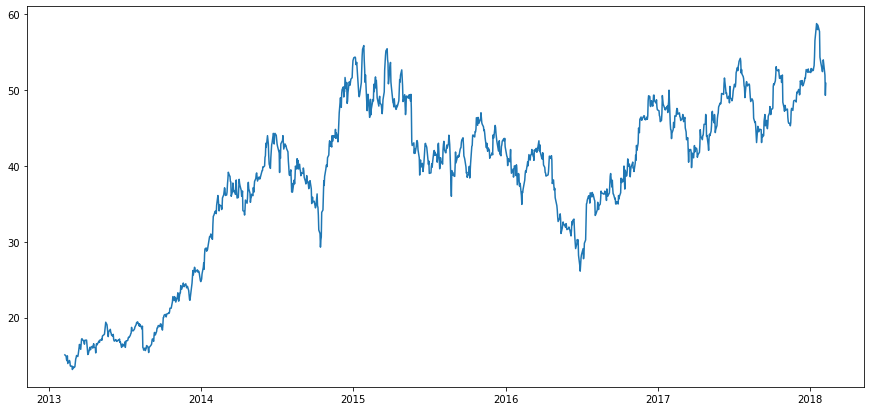

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(a1['date'], a1['open'])
plt.show()

In [ ]:
a1.tail()

,date,open
1254,2018-02-01,54.00
1255,2018-02-02,53.49
1256,2018-02-05,51.99
1257,2018-02-06,49.32
1258,2018-02-07,50.91


In [ ]:
m = Prophet(daily_seasonality=True, seasonality_mode='multiplicative', interval_width=0.95)

In [ ]:
a1.columns = ['ds','y']

In [ ]:
a1

,ds,y
0,2013-02-08,15.07
1,2013-02-11,14.89
2,2013-02-12,14.45
3,2013-02-13,14.30
4,2013-02-14,14.94
...,...,...
1254,2018-02-01,54.00
1255,2018-02-02,53.49
1256,2018-02-05,51.99
1257,2018-02-06,49.32


In [ ]:
model = m.fit(a1)

In [ ]:
predictions = m.make_future_dataframe(periods=60, freq='D')

In [ ]:
result = m.predict(predictions)
result.tail(20)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
1299,2018-03-20,3.583979,47.224488,59.438082,3.243899,4.012073,13.155866,13.155866,13.155866,13.819205,13.819205,13.819205,0.653575,0.653575,0.653575,0.009764,0.009764,0.009764,0.0,0.0,0.0,53.111719
1300,2018-03-21,3.585415,47.337052,59.446762,3.232603,4.031608,13.155866,13.155866,13.155866,13.804847,13.804847,13.804847,0.666487,0.666487,0.666487,-0.017506,-0.017506,-0.017506,0.0,0.0,0.0,53.081515
1301,2018-03-22,3.586850,46.211660,59.633969,3.214584,4.052881,13.155866,13.155866,13.155866,13.766310,13.766310,13.766310,0.656623,0.656623,0.656623,-0.046179,-0.046179,-0.046179,0.0,0.0,0.0,52.964541
1302,2018-03-23,3.588286,46.132787,60.116093,3.185962,4.073929,13.155866,13.155866,13.155866,13.737797,13.737797,13.737797,0.658080,0.658080,0.658080,-0.076149,-0.076149,-0.076149,0.0,0.0,0.0,52.883427
1303,2018-03-24,3.589721,38.140952,51.121936,3.161046,4.090246,13.155866,13.155866,13.155866,11.404094,11.404094,11.404094,-1.644483,-1.644483,-1.644483,-0.107289,-0.107289,-0.107289,0.0,0.0,0.0,44.527240
1304,2018-03-25,3.591157,38.431962,51.247516,3.150152,4.107394,13.155866,13.155866,13.155866,11.371930,11.371930,11.371930,-1.644483,-1.644483,-1.644483,-0.139453,-0.139453,-0.139453,0.0,0.0,0.0,44.429543
1305,2018-03-26,3.592593,44.702510,60.655175,3.139258,4.124640,13.155866,13.155866,13.155866,13.637595,13.637595,13.637595,0.654201,0.654201,0.654201,-0.172472,-0.172472,-0.172472,0.0,0.0,0.0,52.586915
1306,2018-03-27,3.594028,45.164270,60.630423,3.128557,4.139691,13.155866,13.155866,13.155866,13.603287,13.603287,13.603287,0.653575,0.653575,0.653575,-0.206155,-0.206155,-0.206155,0.0,0.0,0.0,52.484625
1307,2018-03-28,3.595464,43.984729,60.364258,3.117940,4.158671,13.155866,13.155866,13.155866,13.582065,13.582065,13.582065,0.666487,0.666487,0.666487,-0.240288,-0.240288,-0.240288,0.0,0.0,0.0,52.429288
1308,2018-03-29,3.596899,44.372824,60.271550,3.107322,4.171188,13.155866,13.155866,13.155866,13.537851,13.537851,13.537851,0.656623,0.656623,0.656623,-0.274638,-0.274638,-0.274638,0.0,0.0,0.0,52.291189


In [ ]:
result[['ds','yhat']].tail()

,ds,yhat
1314,2018-04-04,51.746990
1315,2018-04-05,51.630454
1316,2018-04-06,51.561903
1317,2018-04-07,43.184309
1318,2018-04-08,43.124081


In [ ]:
from fbprophet.plot import plot_plotly, plot_components_plotly
plot_plotly(m,result)